In [1]:
from datetime import datetime
import yfinance as yf
import datetime
import pandas as pd

tickers_list = ['IJR','^DWCPF']

# speeds up pull
yf.pdr_override()

# Download historical data for 'Close' prices from Yahoo Finance
df = yf.download(tickers_list, '2022-1-3', datetime.datetime.today())['Close']

# Extract the prices on January 3, 2022, for each item
jan_3_2022_prices = df.loc['2022-01-03']

# Calculate the percentage difference for each item
percentage_difference = (df - jan_3_2022_prices) / jan_3_2022_prices * 100

# Add the calculated percentage difference as new columns in the DataFrame
df['Percentage_Difference_IJR'] = percentage_difference['IJR']
df['Percentage_Difference_DWCPF'] = percentage_difference['^DWCPF']

# Display the updated DataFrame
print(df)

df.to_excel (r'C:\Users\Family PC\Desktop\pythonfiles\dowcompletionindex\dowcompindex_vs_ijr_v2.xlsx', sheet_name='close_prices', index = True, header=True)



[*********************100%***********************]  2 of 2 completed
                   IJR       ^DWCPF  Percentage_Difference_IJR  \
Date                                                             
2022-01-03  115.769997  2202.659912                   0.000000   
2022-01-04  116.690002  2187.280029                   0.794684   
2022-01-05  113.699997  2110.530029                  -1.788028   
2022-01-06  114.440002  2119.169922                  -1.148825   
2022-01-07  113.160004  2099.280029                  -2.254464   
...                ...          ...                        ...   
2023-07-17  102.220001  1846.560059                 -11.704238   
2023-07-18  103.629997  1866.449951                 -10.486309   
2023-07-19  104.199997  1874.400024                  -9.993954   
2023-07-20  103.419998  1852.729980                 -10.667702   
2023-07-21  103.040001  1848.949951                 -10.995937   

            Percentage_Difference_DWCPF  
Date                          

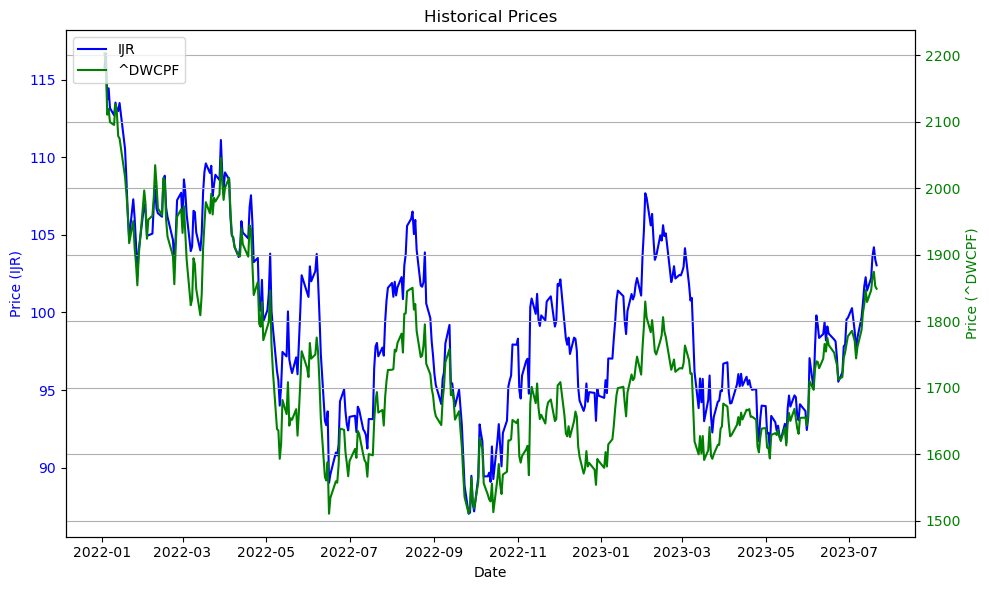

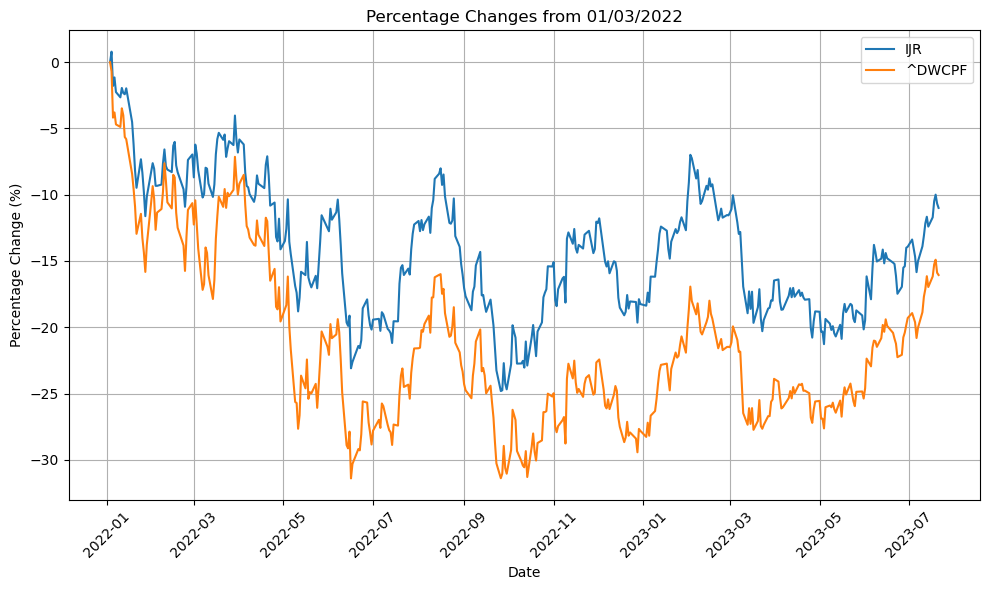

In [6]:
import matplotlib.pyplot as plt

# Create the first chart with one ticker on each y-axis
plt.figure(figsize=(10, 6))
ax1 = plt.gca()  # Get the current Axes instance for the first plot
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Plot the data for 'IJR' on the first y-axis (left side)
ax1.plot(df.index, df['IJR'], label='IJR', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (IJR)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Historical Prices')

# Plot the data for '^DWCPF' on the second y-axis (right side)
ax2.plot(df.index, df['^DWCPF'], label='^DWCPF', color='green')
ax2.set_ylabel('Price (^DWCPF)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the first chart as an image (PNG format) before showing it
plt.savefig(r'C:\Users\Family PC\Desktop\pythonfiles\dowcompletionindex\prices.png')

# Show the first chart on the screen
plt.show()

# Plot the percentage changes chart as before
plt.figure(figsize=(10, 6))
plt.plot(percentage_difference.index, percentage_difference['IJR'], label='IJR')
plt.plot(percentage_difference.index, percentage_difference['^DWCPF'], label='^DWCPF')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Changes from 01/03/2022')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the second chart as an image (PNG format) before showing it
plt.savefig(r'C:\Users\Family PC\Desktop\pythonfiles\dowcompletionindex\percentages.png')

# Show the second chart on the screen
plt.show()
